# **NAME ENTITY RECOGNITION**

# **Table of Contents**

1.   [Introduction](#Introduction)
2.   [Prerequisites](#Prerequisites)
3.   [Applications](#Applications)
4.   [Rule-based-model](#Rule-based-models)
5.   [Machinelearning-model](#Machinelearning-model)
6.   [References](#References)

## **Introduction**

Name Entity recognition(NER) is a subtask of Natural language process(NLP) which focuses on identifying and grouping entities within a text or document.
Entities present specific objects or names such as Persons, organizations, dates and times, countries, drugs, and various unique information within a document.


## **Prerequisites**

Before diving into coding exercises and examples, one should have basic knowledge in the following:
1. python programming
2. writing and creating algorithms
3. problem solving, critical thinking and creative skills

<a id='guide'></a>
## **Applications**

NER is applied in various sectors of our daily lives; so of these applied areas are:
1. Spam detection in emails
2. Use for search engines
3. Finance and Banking
4. Chatbots generation


<a id='guide'></a>
## **Types-of-NER-models**

NER is applied in various sectors of our daily lives; so of these applied areas are:
1. Rule based NER models
2. Machine learning (ML) models
3. Deep learning models

## **Rule-based-model**
A rule-based NER model is a system that relies on manually crafted linguistic rules, such as regular expressions, token patterns, and lexicons, to identify and classify named entities in text without the need for training data.

Examples of rule based approaches

a. Spacy Entity

b. NLTK


### **code-examples-for-NLTK**

In [31]:
%%capture
!pip install svgling

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


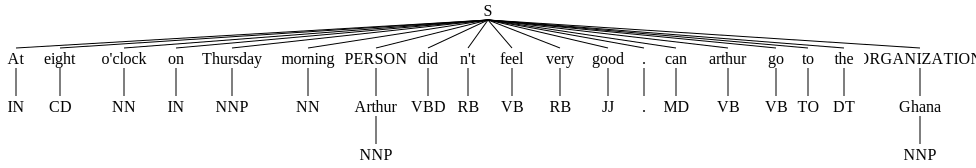

In [32]:
import nltk
import svgling
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')


sentence = "At eight o'clock on Thursday morning Arthur didn't feel very good. can arthur go to the Ghana"
tokens = nltk.word_tokenize(sentence)
tagged = nltk.pos_tag(tokens)


entities = nltk.chunk.ne_chunk(tagged)
entities

### **code-examples-for-Spacy**

In [33]:
#installations
%%capture
!pip install spacy
!pip install nltk
!python -m spacy download en_core_web_sm

In [34]:
import spacy
from spacy import displacy
# import EntityRuler

In [44]:

def spacy_rb_ner(patterns,text,model_name='en'):

  #create a blank model
  nlp = spacy.blank(model_name)

  #create an new entity to for NER
  ruler = nlp.add_pipe("entity_ruler")

  ruler.add_patterns(patterns)


  #extract components from the text
  doc = nlp(text)
  print(doc)
  for ent in doc.ents:
      print(ent.text, ent.label_)

  displacy.render(doc, style="ent")

In [ ]:
patterns = [{"label": "AGE", "pattern": [{"like_num": True}, {"lower": "years"}, {"lower": "old"}]}]
text = "John is 25 years old"
spacy_rb_ner(patterns,text)

25 years old AGE


### **Exercises 1**

Please list some advantages and disadvantages as you try out these rule based name entity recognition models.

Advantages

1.

2.

Disadvantages

1.

2.

### **Exercises 2**

Let's try our hands on sample exercises for better understanding

In [ ]:
# Easy
#customize your own pattern and provide your text for testing
pattern =[]
text = ""
spacy_rb_ner(pattern,text)

In [ ]:
#Hard

#1. dataset extraction from huggingface
import kagglehub

path = kagglehub.dataset_download("remakia/drugs-dictionary")
print("Path to dataset files:", path)

!cp -r /root/.cache/kagglehub/datasets/remakia/drugs-dictionary/versions/1/ .
!mv 1/drugs.json drug.json

#2. load the json dictionary
import json
def read_json(json_file):

  return 0

#3. convert the pattern dictionary into patterns
def generate_patern(collection):

  return 0

#4. test out generated pattern in main
def main():
  json_file = "/content/entities_dataset.json"
  spacy_enr_entity =SpacyNEREntity()

  pattern_dict = spacy_enr_entity.read_json(json_file)
  pattern =spacy_enr_entity.generate_pattern(pattern_dict)
  text = "Asantewaa went to kotoka international airport"
  text = text.lower()
  spacy_rb_ner(pattern,text)

if __name__ == "__main__":
    main()

Path to dataset files: /kaggle/input/drugs-dictionary


NameError: name 'spacy_rb_ner' is not defined

solution

In [48]:
import json

class SpacyNEREntity:
  def __init__(self,json_file):
    self.json_file = json_file

  def read_json(self):

    try:
        with open(self.json_file, 'r') as f:
            data = json.load(f)
            # print(data)
    except FileNotFoundError:
        print("Error: 'file.json' not found. Make sure the file exists in the correct path.")
    except json.JSONDecodeError:
        print("Error: Could not decode JSON from the file. Make sure the file is a valid JSON.")

    return data

  def generate_pattern(self,collections):
    pattern=[]
    patterns=[]
    for collection in collections.items():
      # print(collection[0])
      for i in collection[1]:
        # print(i)
        components = i.split()
        if len(components)>1:

          pattern=[{"lower":items.lower()} for items in components]
          # print(pattern)
        elif len(components)==1:
          # print(components)

          pattern=[{"lower":components[0].lower()}]
        patterns.append({"label":collection[0],"pattern":pattern})
    print(patterns)
    return patterns

def main():
    json_file = "/content/entities_dataset.json"
    spacy_enr_entity =SpacyNEREntity()

    pattern_dict = spacy_enr_entity.read_json(json_file)
    pattern =spacy_enr_entity.generate_pattern(pattern_dict)
    text = "Asantewaa went to kotoka international airport"
    text = text.lower()
    spacy_rb_ner(pattern,text)

if __name__ == "__main__":
    main()

[{'label': 'GPE01', 'pattern': [{'lower': 'ghana'}]}, {'label': 'GPE01', 'pattern': [{'lower': 'nigeria'}]}, {'label': 'GPE01', 'pattern': [{'lower': 'kenya'}]}, {'label': 'GPE01', 'pattern': [{'lower': 'france'}]}, {'label': 'GPE01', 'pattern': [{'lower': 'united'}, {'lower': 'states'}]}, {'label': 'LOC01', 'pattern': [{'lower': 'sahara'}, {'lower': 'desert'}]}, {'label': 'LOC01', 'pattern': [{'lower': 'mount'}, {'lower': 'kilimanjaro'}]}, {'label': 'LOC01', 'pattern': [{'lower': 'lake'}, {'lower': 'victoria'}]}, {'label': 'LOC01', 'pattern': [{'lower': 'atlantic'}, {'lower': 'ocean'}]}, {'label': 'PER01', 'pattern': [{'lower': 'kwame'}, {'lower': 'nkrumah'}]}, {'label': 'PER01', 'pattern': [{'lower': 'ngũgĩ'}, {'lower': 'wa'}, {'lower': "thiong'o"}]}, {'label': 'PER01', 'pattern': [{'lower': 'chinua'}, {'lower': 'achebe'}]}, {'label': 'PER01', 'pattern': [{'lower': 'yaa'}, {'lower': 'asantewaa'}]}, {'label': 'ORG01', 'pattern': [{'lower': 'united'}, {'lower': 'nations'}]}, {'label': 

In [21]:
collections=read_json("entities_dataset.json")

In [18]:
def generate_patern(collections):
  pattern=[]
  patterns=[]
  for collection in collections.items():
    print(collection[0])
    for i in collection[1]:
      components = i.split()
      if len(components)>1:
        pattern=[{"lower":items} for items in components]
      else:
        pattern=[{"lower":components}]
    patterns.append({"label":collection[0],"pattern":pattern})
    print(pattern)

  return patterns


In [19]:
generate_patern(collections)

GPE01
[{'lower': 'UNITED'}, {'lower': 'STATES'}]
LOC01
[{'lower': 'ATLANTIC'}, {'lower': 'OCEAN'}]
PER01
[{'lower': 'YAA'}, {'lower': 'ASANTEWAA'}]
ORG01
[{'lower': 'ASHESI'}, {'lower': 'UNIVERSITY'}]
EVENT01
[{'lower': 'OLYMPIC'}, {'lower': 'GAMES'}]
LANG01
[{'lower': ['TWI']}]
WOA01
[{'lower': 'THE'}, {'lower': 'BEAUTYFUL'}, {'lower': 'ONES'}, {'lower': 'ARE'}, {'lower': 'NOT'}, {'lower': 'YET'}, {'lower': 'BORN'}]
LAW01
[{'lower': 'RIGHT'}, {'lower': 'TO'}, {'lower': 'INFORMATION'}, {'lower': 'BILL'}]
PROD01
[{'lower': 'PLAYSTATION'}, {'lower': '5'}]
FAC01
[{'lower': 'NAIROBI'}, {'lower': 'TERMINAL'}]
DATE01
[{'lower': 'NEW'}, {'lower': "YEAR'S"}, {'lower': 'DAY'}]


0

## **Machinelearning-model**

1. Conditional Random Fields - Conditional Random Fields is a probalistic model that determines or predicts labels based on a given sequence/Input.

It models the conditional probability of a label sequence Y, given an input sequence X:

P(Y | X)


2.

A **Support Vector Machine (SVM)** is a supervised machine learning algorithm that finds the best hyperplane to separate data points into different classes.

In **Named Entity Recognition (NER)**, SVM classifies each token (word) independently, based on its features.
Unlike **Conditional Random Fields (CRFs)**, SVMs do **not** consider the previous or future tags when making predictions.
This can limit their ability to model the context and dependencies between labels in a sentence.

### **Example-code**

Below is an example code of Spacy, a machine learning NER model train with the theory of conditional random fields.

In [ ]:
import pandas as pd
import spacy
import requests

nlp = spacy.load("en_core_web_sm")
pd.set_option("display.max_rows", 200)

content ="Esi is a 27-years-old individual who came back home from school. she is meant to go back to school soon to see her friends. Have you heard from Kwame because the last time i spoke to him, he said he was going to the Ghana, Kigali"

doc = nlp(content)
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

### **Exercise 1**

We will train our own Spacy model.

Installations & downloads

In [ ]:

!pip install nervaluate
!wget https://sls.csail.mit.edu/downloads/restaurant/restauranttest.bio
!wget https://sls.csail.mit.edu/downloads/restaurant/restauranttrain.bio


Importations

In [ ]:
import spacy
import random
from pathlib import Path
from spacy.tokens import DocBin
from spacy.training.example import Example # Correct import for Example
from spacy.util import minibatch
from tqdm import tqdm
import re
from nervaluate import Evaluator



Loading and preprocessing data...
Loaded 7660 annotated sentences. ('2 start restaurants with inside dining', {'entities': [(0, 7, 'Rating'), (25, 38, 'Amenity')]})
Total examples: 7573, Training examples: 6058, Dev examples: 1515

Setting up and training NER model...

--- Loading and Testing Model ---
Test text: 'I want a cheap italian restaurant nearby for dinner.'
Entities found: [('cheap', 'Price'), ('italian', 'Cuisine'), ('nearby', 'Location'), ('dinner.', 'Hours')]

--- Evaluating on Dev Data (micro-averaged) ---
Overall: {'ent_type': {'correct': 2758, 'incorrect': 158, 'partial': 0, 'missed': 96, 'spurious': 183, 'possible': 3012, 'actual': 3099, 'precision': 0.8899645046789287, 'recall': 0.9156706507304117, 'f1': 0.9026345933562429}, 'partial': {'correct': 2678, 'incorrect': 0, 'partial': 238, 'missed': 96, 'spurious': 183, 'possible': 3012, 'actual': 3099, 'precision': 0.9025492094223944, 'recall': 0.9286188579017264, 'f1': 0.9153984617902143}, 'strict': {'correct': 2577, 'in

Helper class

In [ ]:
# anything that is **not** a letter or digit → replace
chars_to_ignore_regex = r"[^A-Za-z0-9]+"

def remove_special_characters(text):
    """
    Replace non-alphanumeric runs with a single space and lowercase the result.
    """
    cleaned = re.sub(chars_to_ignore_regex, " ", text)   # keep letters & digits
    cleaned = re.sub(r"\s+", " ", cleaned)               # squeeze repeated spaces
    return cleaned.lower().strip()

Data processing class



```
# Sample format for a spacy NER dataset
TRAIN_DATA = [
    (
        "a four star restaurant with a bar",
        {
            "entities": [
                (2, 11, "Rating"),   # "four star"
                (23, 29, "Location"), # "with a"
                (30, 33, "Amenity")   # "bar"
            ]
        }
    )
]


{'O': {'start': 12, 'end': 23},
'Rating': {'start': 2, 'end': 12, 'text': 'a four star '},
'Location': {'start': 23, 'end': 30},
 'Amenity': {'start': 30, 'end': 34}}
---------------------------------------------------------------------------
```




Dataset preprocessing

In [ ]:
class NerDataProcessor:
    """
    Class to handle reading and processing of .bio (CoNLL-style) NER data.
    """
    def __init__(self, bio_file_path):
        self.bio_file_path = Path(bio_file_path)
        if not self.bio_file_path.is_file():
            raise FileNotFoundError(f"BIO file not found at: {self.bio_file_path}")


    def read_bio_file(self):
      """
      Reads a CoNLL-style .bio file and returns a list of
      (text, {"entities": [(start, end, label), …]}) tuples.
      """
      TRAIN_DATA , entities =[], []
      entity_start_char_time, entity_end_char_time = 0,0
      sentence ,tag_idx="", ""
      stored_entities={}

      with open(self.bio_file_path, mode='r',encoding="utf8") as f:
        lines = f.readlines()


      for num,line in enumerate(lines):
        line= line.strip()

        part =line.split()
        if len(part)==2:

          token, tag = line.split()
          sentence = sentence + tag + " "

          if tag:
            entity_end_char_time= entity_start_char_time + len(tag.strip())
            if token.startswith("O"):
              entity_start_char_time=entity_end_char_time+1
              continue
            elif token.split("-"):
              idx= token.split("-")[0]

              if token.split("-")[1] in stored_entities:
                stored_entities[token.split("-")[1]]["end"]=entity_end_char_time
                if idx=="B": #new changes
                    stored_entities[token.split("-")[1]]["start"]=entity_start_char_time

              else:
                  stored_entities[token.split("-")[1]]={"start":entity_start_char_time,"end":entity_end_char_time}

              entity_start_char_time=entity_end_char_time+1
        if not line: #this means if it reads an empty line
          entity_start_char_time, entity_end_char_time = 0,0


          entities= [(values[1]['start'],values[1]['end'],values[0]) for values in stored_entities.items()]

          #we normalize the text before passing it
          sentence = remove_special_characters(sentence)
          TRAIN_DATA.append((sentence.strip(),{"entities":entities}))
          sentence ,tag_idx="", ""

          stored_entities={}

      return TRAIN_DATA

    def preprocess_data(self, raw_data):
        """
        Placeholder for any further filtering or augmentation.
        For now, just returns it unchanged.
        Can be extended to, e.g., filter out examples with no entities.
        """
        # Example: Filter out sentences with no entities
        processed_data = [(text, annots) for text, annots in raw_data if annots.get("entities")]
        return processed_data



Spacy trainer class

In [ ]:
class SpacyNerTrainer:
    """
    Class to handle training a spaCy NER model.
    """
    def __init__(self, blank_model_name="en", n_iterations=20, dropout_rate=0.2, batch_size=128, output_dir="./custom_ner_model"):
        self.blank_model_name = blank_model_name
        self.n_iterations = n_iterations
        self.dropout_rate = dropout_rate
        self.batch_size = batch_size
        self.output_dir = Path(output_dir)
        self.nlp = spacy.blank(self.blank_model_name)
        self._setup_ner_pipe()

    def _setup_ner_pipe(self):
        """Initializes or gets the NER pipe."""
        if "ner" not in self.nlp.pipe_names:
            self.ner = self.nlp.add_pipe("ner", last=True)
        else:
            self.ner = self.nlp.get_pipe("ner")

    def _add_labels_to_ner(self, train_data):
        """Adds all unique entity labels from training data to the NER component."""
        all_labels = set()
        for _, annotations in train_data:
            for ent_start, ent_end, label in annotations.get("entities", []):
                all_labels.add(label)
        for label in all_labels:
            self.ner.add_label(label)
        print(f"Added labels to NER: {sorted(list(all_labels))}")

    def train_model(self, train_data):
        """Trains the NER model."""
        self._add_labels_to_ner(train_data)

        # Prepare example data for initialization (can use a subset)
        # Ensure TRAIN_DATA is not empty
        if not train_data:
            print("Error: TRAIN_DATA is empty. Cannot initialize model.")
            return

        example_data_for_init = [
            Example.from_dict(self.nlp.make_doc(text), annots)
            for text, annots in train_data[:min(100, len(train_data))] # Use a subset or all
        ]
        if not example_data_for_init:
            print("Error: Could not create example data for initialization from TRAIN_DATA.")
            return


        other_pipes = [pipe for pipe in self.nlp.pipe_names if pipe != "ner"]
        with self.nlp.disable_pipes(*other_pipes):  # only train NER
            optimizer = self.nlp.initialize(get_examples=lambda: example_data_for_init)

            for itn in range(self.n_iterations):
                random.shuffle(train_data)
                epoch_losses = {}
                batches = minibatch(train_data, size=self.batch_size)

                for batch in tqdm(batches, desc=f"Epoch {itn + 1}/{self.n_iterations}"):
                    examples_for_update = []
                    for text, annotations in batch:
                        doc = self.nlp.make_doc(text)
                        examples_for_update.append(Example.from_dict(doc, annotations))

                    if examples_for_update:
                        self.nlp.update(
                            examples_for_update,
                            drop=self.dropout_rate,
                            sgd=optimizer,
                            losses=epoch_losses
                        )
                if 'ner' in epoch_losses and examples_for_update: # Check if examples_for_update is not empty
                    avg_loss = epoch_losses['ner'] / len(examples_for_update) # More accurate avg per batch step in last batch
                    print(f"Epoch {itn + 1} finished. Average NER Loss (last batch): {avg_loss:.4f} (Total Epoch: {epoch_losses['ner']:.2f})")
                else:
                    print(f"Epoch {itn + 1} finished. Losses: {epoch_losses}")


    def save_model(self):
        """Saves the trained model to the output directory."""
        self.output_dir.mkdir(parents=True, exist_ok=True)
        self.nlp.to_disk(self.output_dir)
        print(f"Saved model to {self.output_dir}")

    def test_model(self, test_text):
        """Loads the saved model and tests it on a sample text."""
        print("\n--- Loading and Testing Model ---")
        try:
            nlp_loaded = spacy.load(self.output_dir)
            doc = nlp_loaded(test_text)
            print(f"Test text: '{test_text}'")
            print("Entities found:", [(ent.text, ent.label_) for ent in doc.ents])
        except Exception as e:
            print(f"Error loading or testing model: {e}")
    def make_dicts_from_offsets(self,text, spans):
      """
      Convert a span list to the dictionaries nervaluate expects.
      """
      out = []

      for span in spans:

          start, end, label = span
          ent_text = text[start:end]
          out.append({
              "text": ent_text,
              "label": label,
              "start": start,
              "end": end,
          })
      return out


Main function class

In [ ]:
def main():
    """Main function to run the NER training pipeline."""
    # --- 1. CONFIGURABLE PARAMETERS ---
    n_iterations = 10
    blank_model_name = "en"
    bio_file_path = "restauranttrain.bio" # Make sure this file exists or change path
    output_model_dir = "./restaurant_ner_model_v2"
    dropout = 0.2
    batch_size_train = 32 # Adjusted batch size


    # --- 2. LOAD & PREPROCESS DATA ---
    print("Loading and preprocessing data...")
    data_processor = NerDataProcessor(bio_file_path=bio_file_path)
    raw_train_data = data_processor.read_bio_file()
    print(f"Loaded {len(raw_train_data)} annotated sentences. {raw_train_data[0]}")
    if not raw_train_data:
        print("No data loaded from BIO file. Exiting.")
        return

    train_data_full = data_processor.preprocess_data(raw_train_data)
    random.shuffle(train_data_full)

    # Split data (e.g., 80% train, 20% dev/test)
    split_ratio = 0.80
    split_index = int(len(train_data_full) * split_ratio)

    TRAIN_DATA = train_data_full[:split_index]
    DEV_DATA = train_data_full[split_index:] # Using DEV_DATA for evaluation later (optional)

    if not TRAIN_DATA:
        print("Not enough data for training after split. Exiting.")
        return

    print(f"Total examples: {len(train_data_full)}, Training examples: {len(TRAIN_DATA)}, Dev examples: {len(DEV_DATA)}")

    # --- 3. TRAIN MODEL ---
    print("\nSetting up and training NER model...")
    trainer = SpacyNerTrainer(
        blank_model_name=blank_model_name,
        n_iterations=n_iterations,
        dropout_rate=dropout,
        batch_size=batch_size_train,
        output_dir=output_model_dir
    )
    trainer.train_model(TRAIN_DATA)

    # --- 4. SAVE MODEL ---
    trainer.save_model()

    # --- 5. TEST MODEL ---
    test_text_example = "I want a cheap italian restaurant nearby for dinner."
    trainer.test_model(test_text_example)

    if DEV_DATA:
        print("\n--- Evaluating on Dev Data (micro-averaged) ---")

        # 1) load model and get label set
        nlp_loaded = spacy.load(output_model_dir)
        tags = sorted(nlp_loaded.pipe_labels["ner"])


        # 2) accumulate references / predictions sentence-by-sentence
        all_refs, all_preds = [], []
        with open ("dev_outputs.txt",'w') as f:

          for idx, sample in enumerate(DEV_DATA):
              text,gold_ann= sample

              doc = nlp_loaded(text)

              gold_spans = gold_ann["entities"]                         # (start,end,label)
              pred_spans = [(ent.start_char, ent.end_char, ent.label_)  # same shape
                            for ent in doc.ents]
              f.write(f"{idx+1}. Text: {text}\n")
              f.write(f"Gold Entities: {gold_spans}\n")
              f.write(f"Pred Entities: {pred_spans}\n")
              f.write('\n')
              # trainer.make_dicts_from_offsets → ♥ keeps your helper
              all_refs.append(trainer.make_dicts_from_offsets(text, gold_spans))
              all_preds.append(trainer.make_dicts_from_offsets(text, pred_spans))

          # 4) one evaluation pass, micro-averaged over all sentences
          evaluator = Evaluator(all_refs, all_preds, tags=tags, loader="default")
          overall, per_type, _, _ = evaluator.evaluate()   # nervaluate ≥0.2.x
          print("Overall:", overall)
          print("Per-type:", per_type)

          prec = overall["strict"]["precision"]
          rec  = overall["strict"]["recall"]
          f1   = overall["strict"]["f1"]

          print(f"Micro Precision: {prec:.2%}")
          print(f"Micro Recall:    {rec:.2%}")
          print(f"Micro F1:        {f1:.2%}")


if __name__ == "__main__":
    main()

## **References**


1. https://www.kaggle.com/code/remakia/introduction-to-ner-part-i-rule-based
2. https://spacy.io/
3. https://www.kaggle.com/code/remakia/introduction-to-ner-part-i-rule-based
4. https://www.nltk.org/
5. https://medium.com/data-science/conditional-random-fields-explained-e5b8256da776


# **Facilitator(s) Details**

**Facilitator(s):**

*   Name: [FELIX TETTEH AKWERH,Adwoa Asantewaa Bremang]
*   Email: [felix.akwerh@knust.edu.gh,adwoabremang@gmail.com]
*   LinkedIn:



# **Reviewer’s Name**

*   Name: [Reviewer’s Name]